# Đồ án thực hành 1 - Regression

Nhóm 16:

18120647 -	Lê Thanh Viễn	
18120363 -	Đặng Văn Hiển	
18120526 -	Ngô Đăng Quang	
18120527 -	Nguyễn Đăng Quang

# Import

In [ ]:
# import thư viện hỗ trợ ma trận đa chiều và dataframe
import numpy as np
import pandas as pd

# import thư viện hỗ trợ trực quan hoá dữ liệu
import seaborn as sns
import matplotlib.pyplot as plt

# import thư viện hỗ trợ học máy miễn phí
# Hàm chia tập train, test ngẫu nhiên
fr
om sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Hàm hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
# Hàm Multi-layer Perceptron regressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm 

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

# Đọc file và thống kê dữ liệu

In [ ]:
# Đọc dữ liệu từ file
df_train = pd.read_csv("https://raw.githubusercontent.com/meteorwen/R_language/e076bee261868d65f6f8a36118d655725bcdf093/sparklyr/ml_linear_regression/multiple%20linear%20regression(1%2C2)/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/meteorwen/R_language/e076bee261868d65f6f8a36118d655725bcdf093/sparklyr/ml_linear_regression/multiple%20linear%20regression(1%2C2)/test.csv")

In [ ]:
# Kiểm tra dữ liệu đã đọc
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,32,male,28.88,0,no,northwest,3866.8552
1,46,female,33.44,1,no,southeast,8240.5896
2,37,male,29.83,2,no,northeast,6406.4107
3,62,female,26.29,0,yes,southeast,27808.7251
4,56,male,40.30,0,no,southwest,10602.3850


In [ ]:
# Kiểm tra có giá trị null không của tập train và test(đếm số giá trị null) 
df_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Kiểm tra các kiểu dữ liệu của dataframe có phù hợp tính toán chưa
df_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Xét các đại lượng thống kê 
df_train.describe(include ="all")

,age,sex,bmi,children,smoker,region,charges
count,950.000000,950,950.000000,950.000000,950,950,950.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,479,NaN,NaN,761,271,NaN
mean,38.848421,NaN,30.958637,1.110526,NaN,NaN,13399.729280
std,14.044344,NaN,6.233292,1.213463,NaN,NaN,12350.030348
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1131.506600
25%,26.000000,NaN,26.410000,0.000000,NaN,NaN,4669.053787
50%,39.000000,NaN,30.687500,1.000000,NaN,NaN,9423.922650
75%,51.000000,NaN,35.307500,2.000000,NaN,NaN,17084.220700


---

# Trực quan hoá và phân tích dữ liệu 

## 1. Biểu đồ tần suất các trường dữ liệu

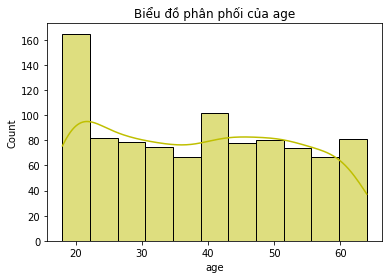

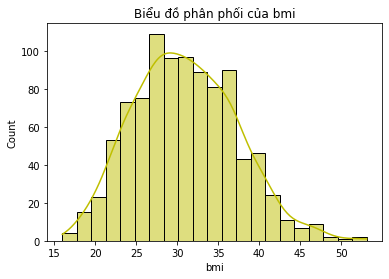

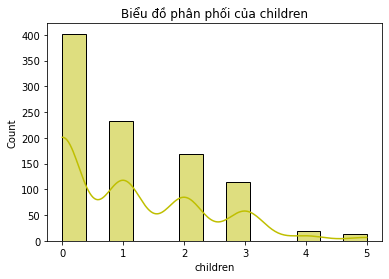

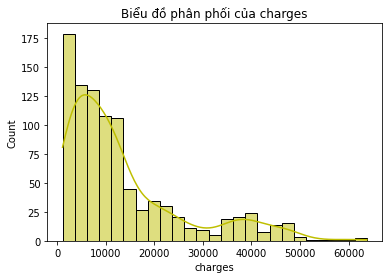

In [ ]:
# Trực quan hóa phân bố dữ liệu chi phí y tế
for column in df_train.columns:
  if df_train[column].dtypes == np.object:
    continue
 #plt.figure()            
  plt.title('Biểu đồ phân phối của ' + column)
  sns.histplot(df_train[column], kde = True, color='y')
  plt.show()


## 2. Tương quan giữa các trường dữ liệu

#### Tương quan giữa các trường loại Numerical

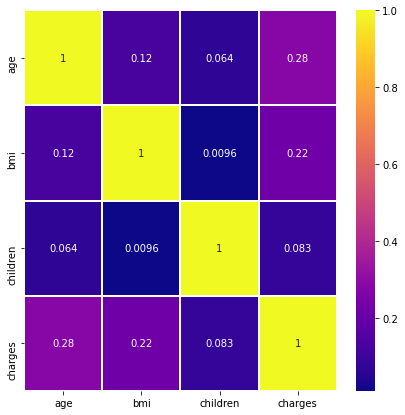

In [ ]:
plt.subplots(figsize=(7, 7))
sns.heatmap(df_train.corr(), annot=True, cmap='plasma', linewidths=1)

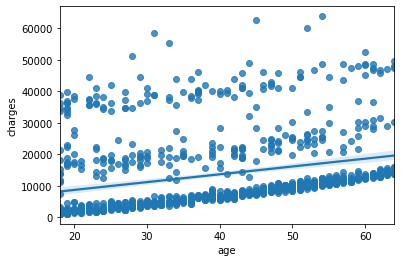

In [ ]:
# Biểu đồ hồi quy tuyến tính thể hiện mối tương quan giữa 2 trường dữ liệu age và charges
sns.regplot(x=df_train['age'],y=df_train['charges'])

*Nhận xét: `Độ tuổi` càng cao thì `chi phí y tế` cũng tăng theo.*



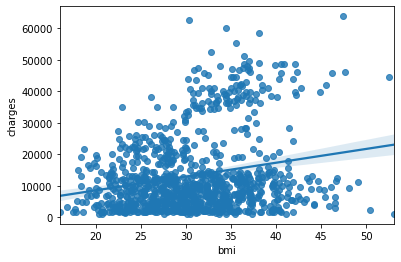

In [ ]:
# Biểu đồ hồi quy tuyến tính thể hiện mối tương quan giữa 2 trường dữ liệu bmi và charges
sns.regplot(x=df_train['bmi'],y=df_train['charges'])

*Nhận xét: `Chi số BMI` càng cao thì `chi phí y tế` cũng tăng theo.*

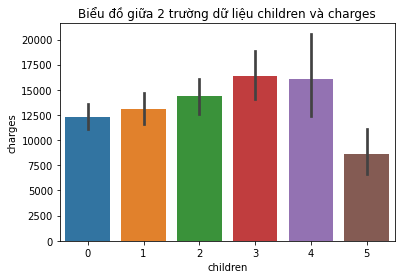

In [ ]:
# Biểu đồ giữa 2 trường dữ liệu children và charges
sns.barplot(x=df_train['children'], y=df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu children và charges')
plt.show()


*Nhận xét: Chi phí y tế tăng dần khi về 3 - 4 con* 

#### Mối tương quan giữa các thuộc tính Catergorical

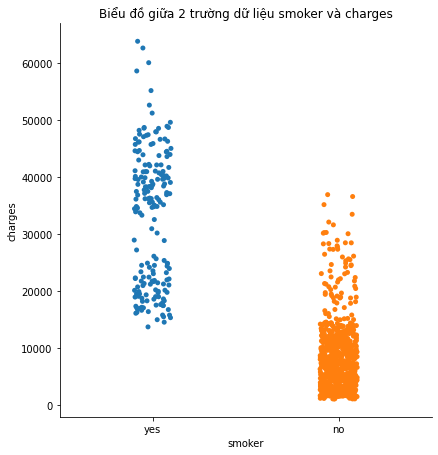

In [ ]:
# Biểu đồ giữa 2 trường dữ liệu smoker và charges
sns.catplot(x = 'smoker', y = 'charges',data=df_train, height=6, aspect=1)
plt.title('Biểu đồ giữa 2 trường dữ liệu smoker và charges')
plt.show()


Nhận xét: 
- Hầu hết người không hút thuốc có chi phí y tế thấp.
- Người hút thuốc có chi phí y tế có thể dao động lên rất cao.

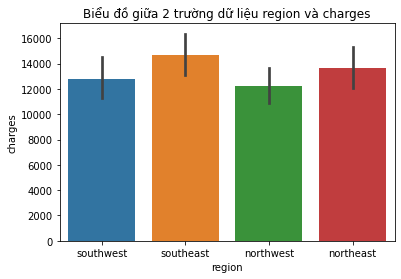

In [ ]:
# Biểu đồ giữa 2 trường dữ liệu region và charges
sns.barplot(x=df_train['region'],y = df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu region và charges')
plt.show()

*Nhận xét:*

*- Độ chênh lệch giữa các vùng không nhiều.*

*- Những người vùng Đông Nam sẽ có chi phí y tế cao nhất, vùng Tây Bắc thấp nhất.*

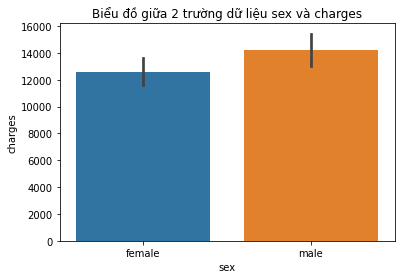

In [ ]:
# Biểu đồ giữa 2 trường dữ liệu sex và charges
sns.barplot(x=df_train['sex'],y = df_train['charges'])
plt.title('Biểu đồ giữa 2 trường dữ liệu sex và charges')
plt.show()

*Nhận xét:*

*- Độ chênh lệch chi phí y tế giữa giới tính không nhiều.*

*- Những người nam sẽ có chi phí y tế cao hơn tuy không nhiều.*


# Tiền xử lý dữ liệu

In [ ]:
# Lấy trường charges
y_train = df_train["charges"] 
X_train = df_train.drop("charges", axis=1)

In [ ]:
# Chuyển kiểu chuỗi chuẩn bị cho One-hot Endcoding
#X_train["smoker"] = X_train["smoker"].astype(str)
# Thay thế [female, male] trong cột sex thành dạng nhị phân [0, 1]
X_train['sex'] = X_train['sex'].astype('category').cat.codes
# Thay thế [yes, no] trong cột smoker thành dạng nhị phân [1, 0]
X_train['smoker'] = X_train['smoker'].astype('category').cat.codes

In [ ]:
# Chuẩn hoá dữ liệu với StandardScaler và OneHotEncoder
column_trans =  ColumnTransformer([('standardScaler', StandardScaler(), ['age','sex', 'bmi', 'children','smoker']),
                                   ('oneHotEncoder', OneHotEncoder(), ['region'])])
X_train=column_trans.fit_transform(X_train)

In [ ]:
X_train.shape

(950, 9)

# Cài đặt các thuật toán máy học

- Linear Regression

In [ ]:
ln_reg  = LinearRegression()
ln_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Dự đoán chi phí y tế cá nhân
y_pred = ln_reg.predict(X_train)

In [ ]:
# Các hệ số và hệ số tự do
#['age', 'bmi', 'children', 'smoker','sex','region']
print('Coefficients:    [\'age\', \'sex\',\'bmi\', \'children\', \'smoker\',\'region_4\'] \n', ln_reg.coef_)  
print('Intercept:        \n', ln_reg.intercept_)

Coefficients:    ['age', 'sex','bmi', 'children', 'smoker','region_4'] 
 [3679.68582409 -268.27390578 1831.42414159  544.75596347 9310.13043557
  114.42003127  -23.88639619 -131.99445682   41.46082173]
Intercept:        
 12952.388298152717


In [ ]:
# Mean Squared Error
def MSE(y, y_pred):
  return ((y_pred -y) ** 2).mean()

# R-squared Score
def R2(y, y_pred):
  SSres = MSE(y, y_pred)
  SStot = MSE(y, y.mean())
  return 1 - SSres / SStot

def P_value()
  p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]


In [ ]:
# Điểm R squared Linear Regression
R2_score = R2(y_train,y_pred)
print(f"R squared: {R2_score}")

R squared: 0.7432689863250113


- Neural Network

In [ ]:
# Tạo tập Training và validation
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
mlp_reg = MLPRegressor(solver = "lbfgs", random_state=0, max_iter=500 )

val_errs = []
alphas = [0.00001, 0.0001, 0.001,0.1]
hidden_layer_sizes = [(10,), (10,2),(5,), (5,2),(4,),(4,2),(3,),(3,2)]
max_score = 0; 
best_alpha = None; 
best_hidden_layer_sizes = None
for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        mlp_reg.set_params(hidden_layer_sizes = hidden_layer_size, alpha = alpha)
        mlp_reg.fit(train_X, train_y)
        val_score = mlp_reg.score(val_X, val_y)
        if float(val_score) > max_score:
            max_score = val_score
            best_alpha = alpha
            best_hidden_layer_sizes = hidden_layer_size

In [ ]:
print(f"Best hidden_layer_sizes: {best_hidden_layer_sizes}")
print(f"Best alpha: {best_alpha}")

mlp_reg.set_params(hidden_layer_sizes = best_hidden_layer_sizes, alpha = best_alpha)
mlp_reg.fit(train_X, train_y)


Best hidden_layer_sizes: (4, 2)
Best alpha: 0.001


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(4, 2), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Test Model

In [ ]:
# Tiền xử lý dữ liệu cho test
y_test = df_test["charges"]
X_test = df_test.drop("charges", axis=1)
X_test['sex'] = X_test['sex'].astype('category').cat.codes
X_test['smoker'] = X_test['smoker'].astype('category').cat.codes
X_test=column_trans.fit_transform(X_test)

In [ ]:
# hàm vẽ tương quan giữa giá trị dự đoán và giá trị test
def PlotPredvsActual(y_pred,y_test):
  x = np.linspace(-1000, 50000, 1000)
  plt.scatter(y_pred, y_test)
  plt.title('Scatter plot predict by training vs testing data')
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')
  plt.grid()
  # Đường thẳng hồi quy 
  sns.regplot(x=y_pred,y=y_test)
  # Đường thẳng y = x
  plt.plot(x, x, 'r--');
  plt.show()

- Linear Regression

In [ ]:
# Nạp dữ liệu và chạy model
ln_reg.fit(X_test,y_test)
y_pred = ln_reg.predict(X_test)
# Điểm R squared Linear Regression
R2_score = R2(y_test,y_pred)
print(f"R squared: {R2_score}")

R squared: 0.7820156922967487


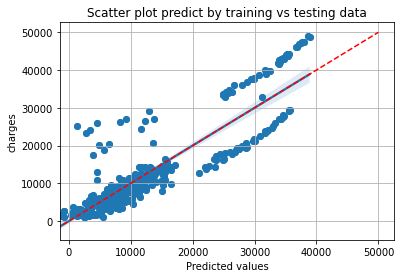

In [ ]:
# Biểu đồ tương quan giữa giá trị dự đoán và giá trị test
PlotPredvsActual(y_pred,y_test)

- Neural network

In [ ]:
# Nạp dữ liệu và chạy model
mlp_reg.fit(X_test, y_test)
y_pred = ln_reg.predict(X_test)
# Điểm R squared Neural network
print(f"R squared: {mlp_reg.score(X_test, y_test)}")

R squared: 0.8952015863433441


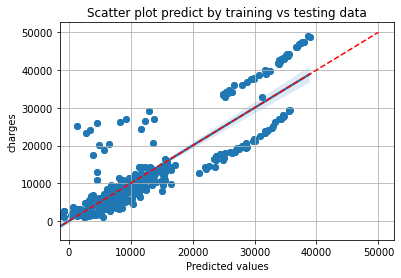

In [ ]:
# Biểu đồ tương quan giữa giá trị dự đoán và giá trị test
PlotPredvsActual(y_pred,y_test)

# Nhận xét


In [ ]:

# statsmodel
x2 = sm.add_constant(X_train)
models = sm.OLS(y_train,x2)
fit = models.fit()
fit.summary()

#for attributeIndex in range (0, X_train.shape[1]+1):
#    print(fit.pvalues[attributeIndex])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     340.5
Date:                Fri, 14 May 2021   Prob (F-statistic):          1.04e-271
Time:                        12:00:50   Log-Likelihood:                -9652.0
No. Observations:                 950   AIC:                         1.932e+04
Df Residuals:                     941   BIC:                         1.937e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+04    163.649     65.623      0.000    1.04e+04    1.11e+04
x1          3627.8872    206.472     17.571      0.000    3222.688    4033.086
x2            19.1600    204.903      0.094      0.926    -382.960     421.280
x3          2089.0837    214.687      9.731      0.000    1667.762    2510.405
x4           550.0828    204.641      2.688      0.007     148.477     951.689
x5          9775.6357    205.513     47.567      0.000    9372.318    1.02e+04
x6          3444.6011    364.730      9.444      0.000    2728.824    4160.379
x7          3057.7566    366.451      8.344      0.000    2338.600    3776.913
x8          2106.4779    352.130      5.982      0.000    1415.427    2797.529
x9          2130.3353    364.399      5.846      0.000    1415.207    2845.463
==============================================================================
Omnibus:                      198.534   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.628
Skew:                           1.142   Prob(JB):                     2.82e-97
Kurtosis:                       5.453   Cond. No.                     3.63e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_train.view()

array([[-1.41401236, -0.99161411, -0.49095212, ...,  0.        ,
         0.        ,  1.        ],
       [-1.4852529 ,  1.00845681,  0.45126139, ...,  0.        ,
         1.        ,  0.        ],
       [-0.77284744,  1.00845681,  0.32766609, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.4852529 , -0.99161411,  0.15431165, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4852529 , -0.99161411,  0.94564259, ...,  0.        ,
         1.        ,  0.        ],
       [-1.27153126, -0.99161411, -0.82803021, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# some example data
X = pd.DataFrame({'feature': ['value1', 'value2', 'value2', 'value1', 'value2']})
y = [1, 0, 0, 1, 1]

# translate rows to dicts
def row_to_dict(X, y=None):
    return X.apply(dict, axis=1)

# define prediction model
ft = FunctionTransformer(row_to_dict, validate=False)
dv = DictVectorizer()
rf = RandomForestClassifier()

# glue steps together
model = make_pipeline(ft, dv, rf)

# train
model.fit(X, y)
print(rf.feature_importances_)
# get feature importances
feature_importances = zip(dv.feature_names_, rf.feature_importances_)

# have a look
print(list(feature_importances))

[0.53409091 0.46590909]
[('feature=value1', 0.5340909090909091), ('feature=value2', 0.4659090909090909)]


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# some example data
X = pd.DataFrame(X_train)
X.columns = ['age', 'bmi', 'children', 'smoker','sex','region','region','region','region']
# translate rows to dicts
def row_to_dict(X, y=None):
    return X.apply(dict, axis=1)

# define prediction model
ft = FunctionTransformer(row_to_dict, validate=False)
dv = DictVectorizer()
rf = RandomForestClassifier()

# glue steps together
model = make_pipeline(ft, dv, rf)

# train
model.fit(X, y_train)

# get feature importances
feature_importances = zip(dv.feature_names_, rf.feature_importances_)

# have a look
print(list(feature_importances))

ValueError: ignored

In [ ]:
print(X,y_train)

In [ ]:
len(mlp_reg.coefs_[0][0][0])


In [ ]:
mlp_reg.coefs_

[array([[  0.03730809,  31.64509546,  -0.66919083,   0.65424549,
           5.33288238],
        [ -2.65055049,   3.26026897,  -0.40298242,   2.18138761,
           1.12041808],
        [ -4.71743546,   8.37758785,  -8.06720589,  18.20776534,
          -5.40748666],
        [  1.75630094,  -4.306878  ,  -1.82111635,   0.49245823,
          -2.98987648],
        [ -1.90219295,  20.11845329, -18.98433436,  31.59436211,
          -4.48746851],
        [  2.02403674,  16.83160821,  -6.75063522,  -3.81696678,
         -10.31924238],
        [ 14.78334554,   0.92016249,   9.39474343, -13.68092699,
          -5.79787658],
        [ -1.86306003,  -1.90476079,   2.50959325,  -9.4993387 ,
          12.99623182],
        [  1.95494602,   1.5850915 ,   3.71004361,  -3.72440518,
           6.55172906]]), array([[ 20.92973084,  -0.1136879 ],
        [  3.35742142,  -0.73686979],
        [-18.40034731,  -0.62713288],
        [ 29.1109162 ,  -0.45681516],
        [ 16.03492523,  -0.47323182]]), array(